<a href="https://colab.research.google.com/github/RokiFauziErenJaegar/TugasIDS/blob/main/Tugas_IDS_dengan_Machine_Learning_Roki_Fauzi_1301218577.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('sample_data/Train_data.csv')
df_test = pd.read_csv('sample_data/test_data.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)

In [ ]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [ ]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [ ]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [ ]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
from sklearn import linear_model

LR = linear_model.LinearRegression(copy_X=True, fit_intercept=True)
LR.fit(X_train, Y_train)

lr_score = LR.score(X_test, Y_test)
print('Linear regression processing...')
print('Linear regression Score: %.2f %%' % lr_score)



Linear regression processing...
Linear regression Score: 0.33 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2),
          algorithm='SAMME.R', learning_rate=1.0, n_estimators=100, random_state=None)

AB.fit(X_train, Y_train)

AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing...')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)


AdaBoostClassifier processing...
AdaBoostClassifier Score: 0.758 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RF.fit(X_train, Y_train)

RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing...')
print('RandomForestClassifier Score: %.3f %%' % rf_score)


RandomForestClassifier processing...
RandomForestClassifier Score: 0.761 %


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ET.fit(X_train, Y_train)

ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing...')
print('ExtraTreesClassifier Score: %.3f %%' % et_score)


ExtraTreesClassifier processing...
ExtraTreesClassifier Score: 0.765 %


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

GB.fit(X_train, Y_train)

GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing...')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)


GradientBoostingClassifier processing...
GradientBoostingClassifier Score: 0.773 %


In [ ]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000100,0.003037,0.002748,0.001520
1,protocol_type,0.460445,0.016487,0.026752,0.011482
2,service,0.520246,0.019419,0.018524,0.007765
3,flag,0.000047,0.005162,0.007790,0.001150
4,src_bytes,0.006694,0.128474,0.024052,0.361352
5,dst_bytes,0.001414,0.139697,0.006357,0.062344
6,land,0.000005,0.000152,0.000082,0.000036
7,wrong_fragment,0.000102,0.006337,0.015631,0.013344


[Text(0, 0, 'duration'),
 Text(0, 0, 'protocol_type'),
 Text(0, 0, 'service'),
 Text(0, 0, 'flag'),
 Text(0, 0, 'src_bytes'),
 Text(0, 0, 'dst_bytes'),
 Text(0, 0, 'land'),
 Text(0, 0, 'wrong_fragment'),
 Text(0, 0, 'urgent'),
 Text(0, 0, 'hot'),
 Text(0, 0, 'num_failed_logins'),
 Text(0, 0, 'logged_in'),
 Text(0, 0, 'num_compromised'),
 Text(0, 0, 'root_shell'),
 Text(0, 0, 'su_attempted'),
 Text(0, 0, 'num_root'),
 Text(0, 0, 'num_file_creations'),
 Text(0, 0, 'num_shells'),
 Text(0, 0, 'num_access_files'),
 Text(0, 0, 'is_host_login'),
 Text(0, 0, 'is_guest_login'),
 Text(0, 0, 'count'),
 Text(0, 0, 'srv_count'),
 Text(0, 0, 'serror_rate'),
 Text(0, 0, 'srv_serror_rate'),
 Text(0, 0, 'rerror_rate'),
 Text(0, 0, 'srv_rerror_rate'),
 Text(0, 0, 'same_srv_rate'),
 Text(0, 0, 'diff_srv_rate'),
 Text(0, 0, 'srv_diff_host_rate'),
 Text(0, 0, 'dst_host_count'),
 Text(0, 0, 'dst_host_srv_count'),
 Text(0, 0, 'dst_host_same_srv_rate'),
 Text(0, 0, 'dst_host_diff_srv_rate'),
 Text(0, 0, 'dst_

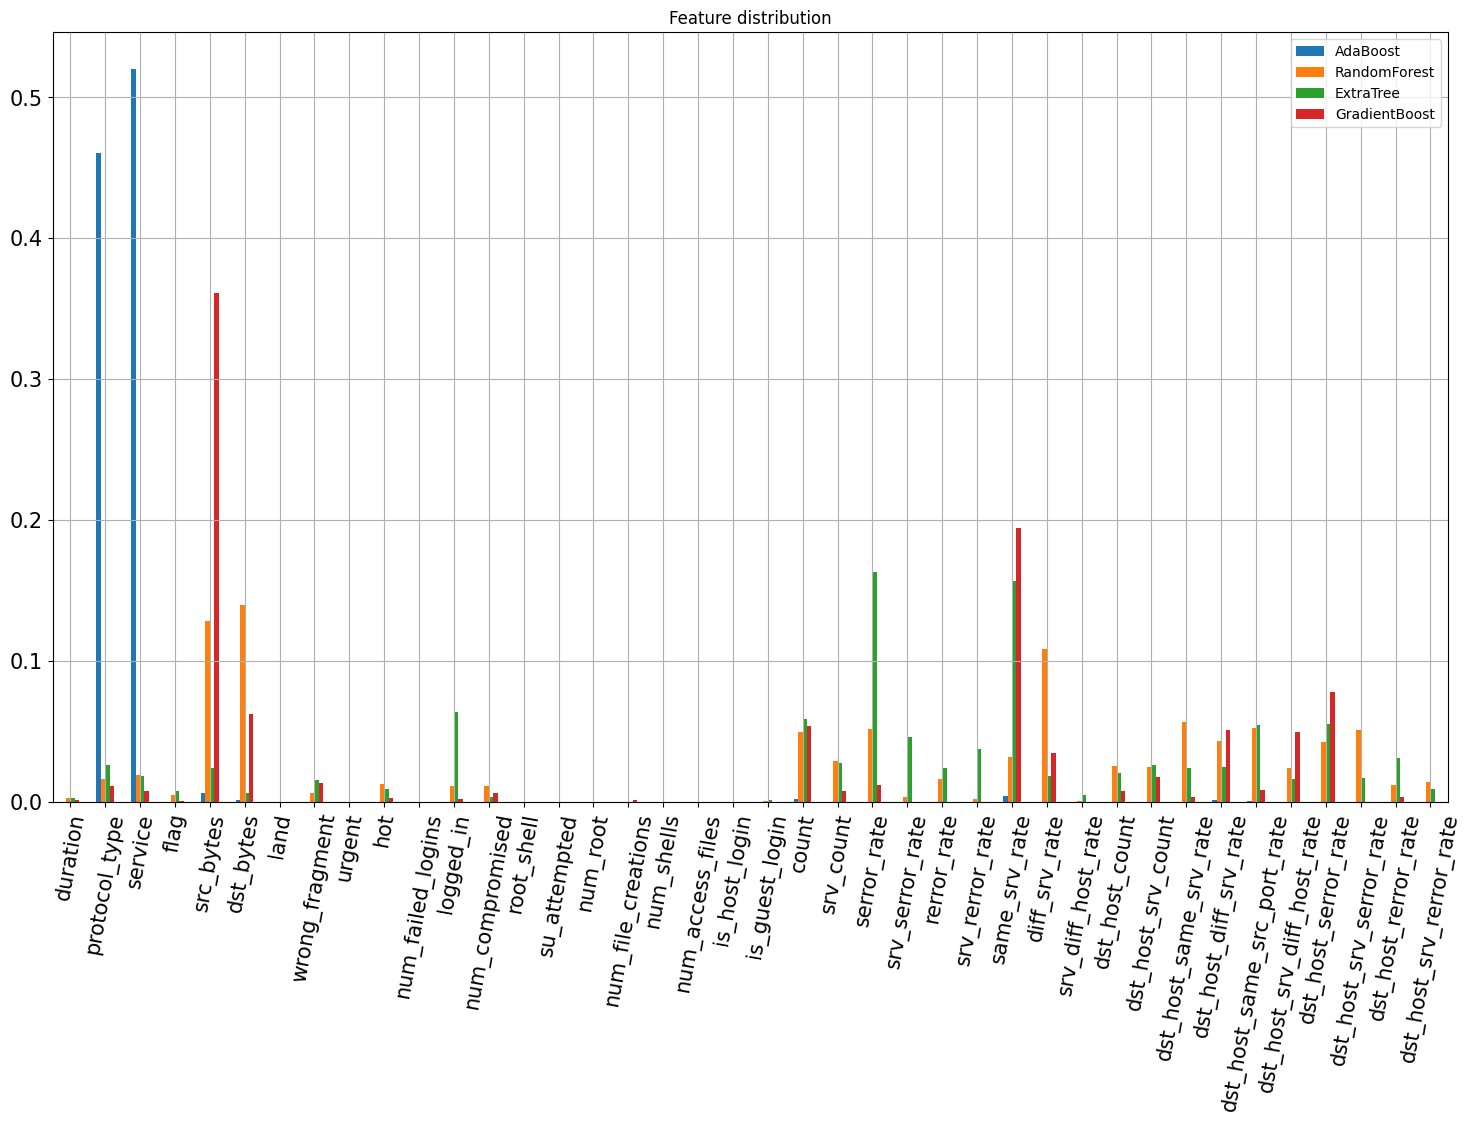

In [ ]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from matplotlib.text import Text

graph = feature_df.plot.bar(figsize=(18, 10), title='Feature distribution', grid=True, legend=True, fontsize=15, xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation=80)
[Text(0, 0, 'duration'),
 Text(0, 0, 'protocol_type'),
 Text(0, 0, 'service'),
 Text(0, 0, 'flag'),
 Text(0, 0, 'src_bytes'),
 Text(0, 0, 'dst_bytes'),
 Text(0, 0, 'land'),
 Text(0, 0, 'wrong_fragment'),
 Text(0, 0, 'urgent'),
 Text(0, 0, 'hot'),
 Text(0, 0, 'num_failed_logins'),
 Text(0, 0, 'logged_in'),
 Text(0, 0, 'num_compromised'),
 Text(0, 0, 'root_shell'),
 Text(0, 0, 'su_attempted'),
 Text(0, 0, 'num_root'),
 Text(0, 0, 'num_file_creations'),
 Text(0, 0, 'num_shells'),
 Text(0, 0, 'num_access_files'),
 Text(0, 0, 'is_host_login'),
 Text(0, 0, 'is_guest_login'),
 Text(0, 0, 'count'),
 Text(0, 0, 'srv_count'),
 Text(0, 0, 'serror_rate'),
 Text(0, 0, 'srv_serror_rate'),
 Text(0, 0, 'rerror_rate'),
 Text(0, 0, 'srv_rerror_rate'),
 Text(0, 0, 'same_srv_rate'),
 Text(0, 0, 'diff_srv_rate'),
 Text(0, 0, 'srv_diff_host_rate'),
 Text(0, 0, 'dst_host_count'),
 Text(0, 0, 'dst_host_srv_count'),
 Text(0, 0, 'dst_host_same_srv_rate'),
 Text(0, 0, 'dst_host_diff_srv_rate'),
 Text(0, 0, 'dst_host_same_src_port_rate'),
 Text(0, 0, 'dst_host_srv_diff_host_rate'),
 Text(0, 0, 'dst_host_serror_rate'),
 Text(0, 0, 'dst_host_srv_serror_rate'),
 Text(0, 0, 'dst_host_rerror_rate'),
 Text(0, 0, 'dst_host_srv_rerror_rate')]


In [ ]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [ ]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.520246,0.019419,0.018524,0.007765
1,protocol_type,0.460445,0.016487,0.026752,0.011482
4,src_bytes,0.006694,0.128474,0.024052,0.361352
27,same_srv_rate,0.004401,0.032114,0.156697,0.194879
21,count,0.002363,0.049902,0.059015,0.054398
33,dst_host_diff_srv_rate,0.001808,0.043227,0.024726,0.050901
5,dst_bytes,0.001414,0.139697,0.006357,0.062344
34,dst_host_same_src_port_rate,0.000786,0.052997,0.054977,0.008548
36,dst_host_serror_rate,0.000345,0.042543,0.055201,0.078075
31,dst_host_srv_count,0.000320,0.024675,0.026470,0.017985


In [ ]:
selected_features = result['features'].values.tolist()
selected_features

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'serror_rate',
 'logged_in',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_rerror_rate',
 'srv_count',
 'dst_host_srv_diff_host_rate',
 'diff_srv_rate',
 'wrong_fragment',
 'dst_host_srv_serror_rate']

In [ ]:
AB.fit(X_train_stdrop, Y_train)
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab2_score)


AdaBoostClassifier_stdrop processing ,,,
AdaBoostClassifier Score: 0.736 %


In [ ]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.752 %


In [ ]:
ET.fit(X_train_stdrop, Y_train)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)


ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.759 %


In [ ]:
GB.fit(X_train_stdrop, Y_train)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)


GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.75 %


In [ ]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_count,...,serror_rate,logged_in,srv_serror_rate,srv_rerror_rate,dst_host_rerror_rate,srv_count,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment,dst_host_srv_serror_rate
0,25,0,0,1.0,110,0.00,0,0.00,0.65,255,...,1.0,0,1.0,0.0,0.32,110,0.00,0.0,0,0.65
1,25,0,312,1.0,1,0.00,1856,1.00,0.00,254,...,0.0,1,0.0,0.0,0.00,9,0.06,0.0,0,0.00
2,25,0,245,1.0,5,0.00,2058,0.01,0.01,255,...,0.0,1,0.0,0.0,0.00,5,0.05,0.0,0,0.00
3,25,0,298,1.0,4,0.00,1267,0.00,0.00,255,...,0.0,1,0.0,0.0,0.00,18,0.00,0.0,0,0.00
4,20,0,740,1.0,1,0.03,0,0.18,0.00,19,...,0.0,0,0.0,0.0,0.00,1,0.00,0.0,0,0.00


<Axes: >

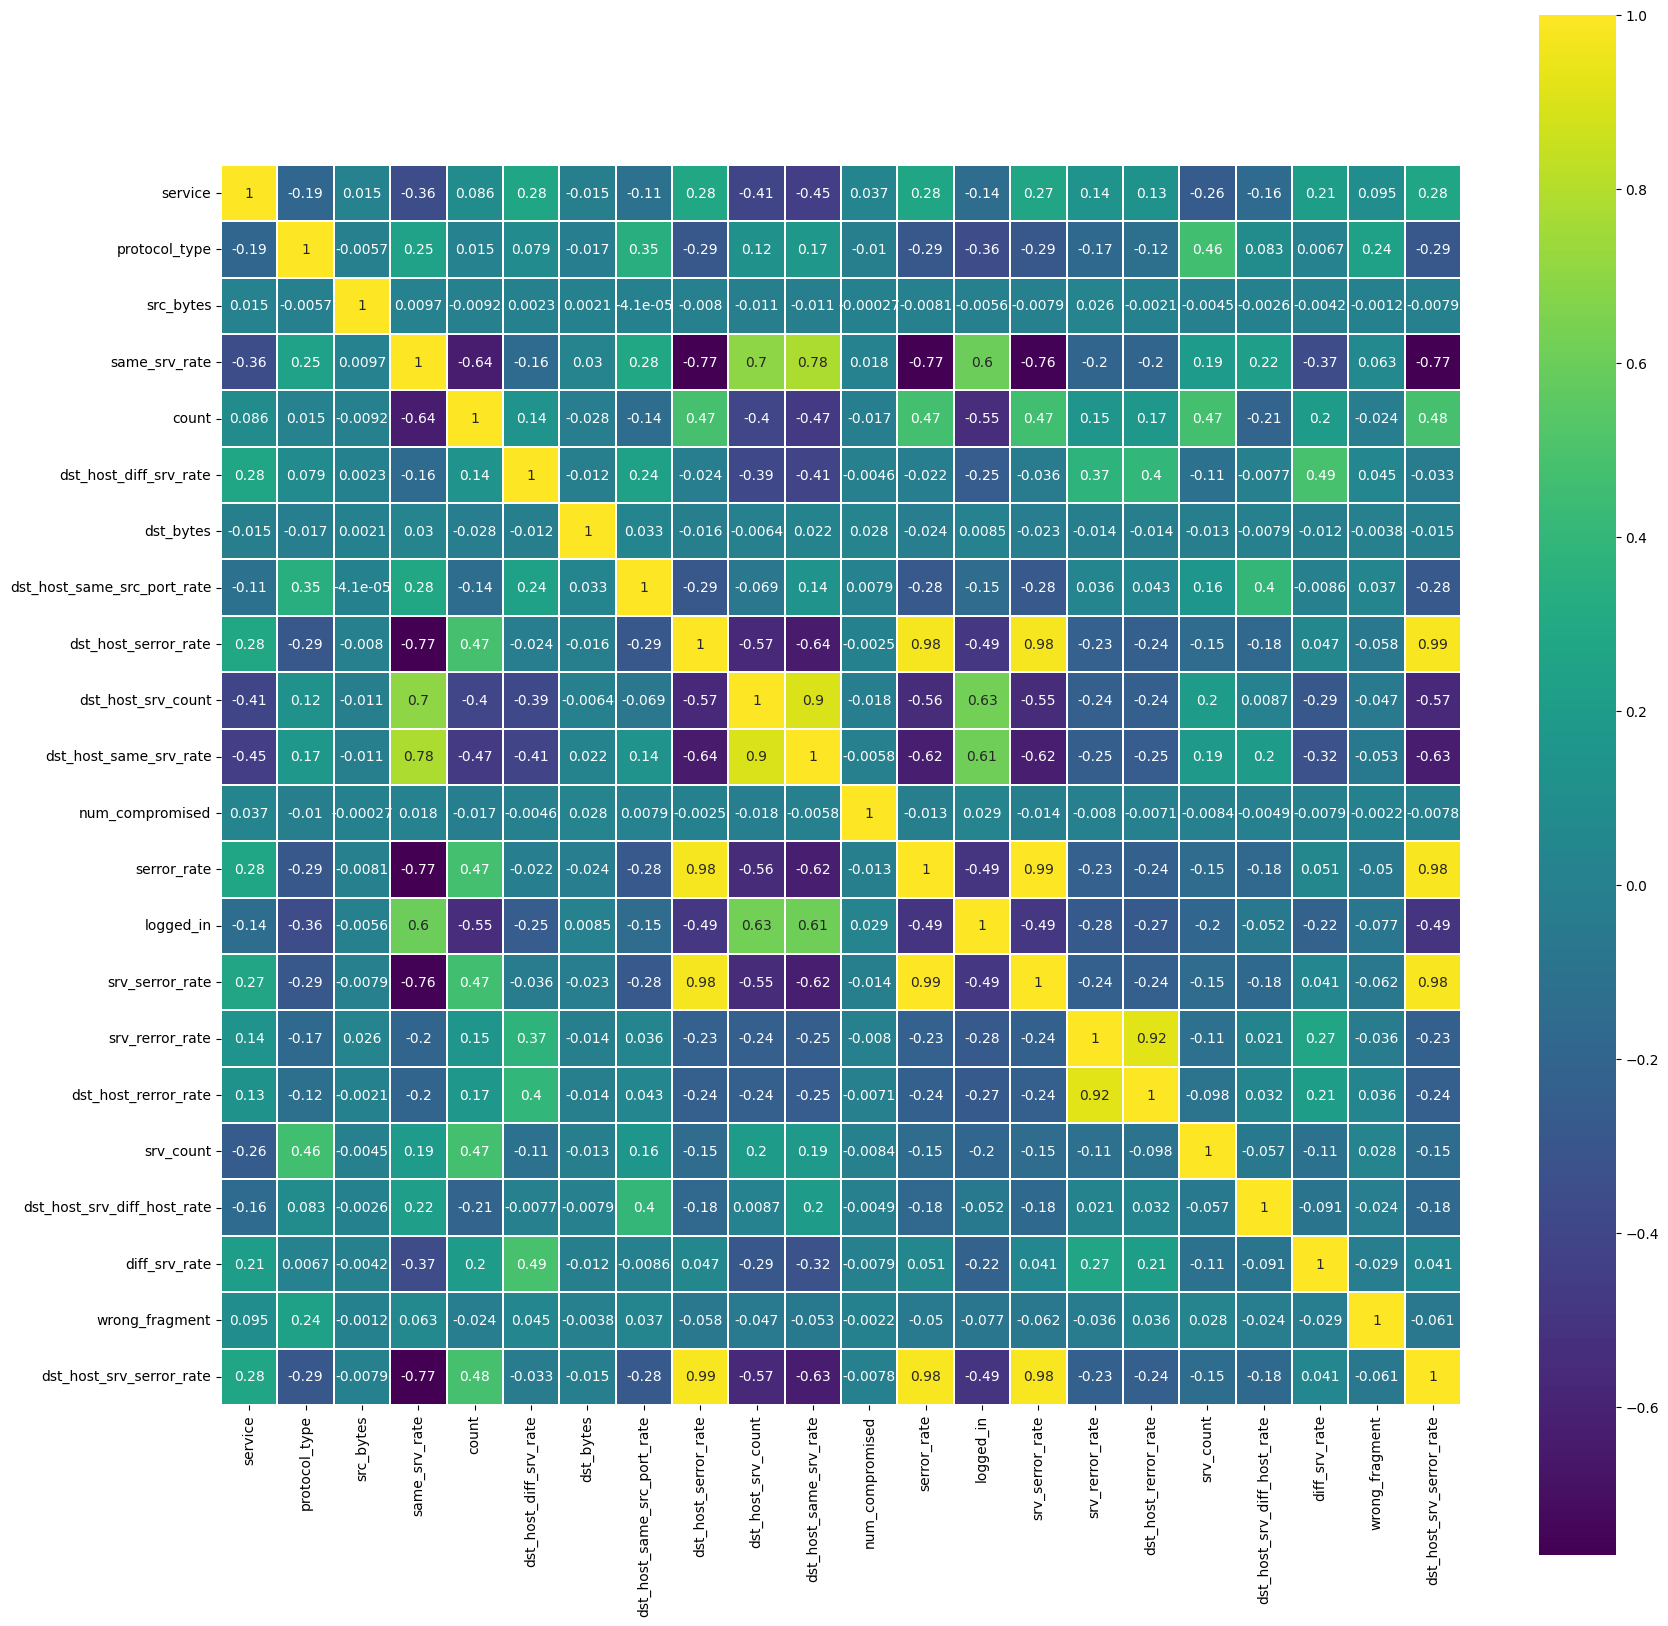

In [ ]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [ ]:
selected2 = ['flag', 'dst_host_serror_rate', 'serror_rate']

# Check if the columns exist in X_train_ens
columns_to_drop = [col for col in selected2 if col in X_train_ens.columns]

X_train_cordrop = X_train_ens.drop(columns_to_drop, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(columns_to_drop, axis=1)
X_test_cordrop.describe()


,service,protocol_type,src_bytes,same_srv_rate,count,dst_host_diff_srv_rate,dst_bytes,dst_host_same_src_port_rate,dst_host_srv_count,dst_host_same_srv_rate,num_compromised,logged_in,srv_serror_rate,srv_rerror_rate,dst_host_rerror_rate,srv_count,dst_host_srv_diff_host_rate,diff_srv_rate,wrong_fragment,dst_host_srv_serror_rate
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,35.451700,0.278600,6.845032e+03,0.739925,80.152400,0.089412,1.996999e+03,0.133167,139.645700,0.605769,0.020500,0.436600,0.101696,0.238538,0.236296,31.730900,0.020102,0.089752,0.009000,0.097781
std,15.824769,0.657134,8.675409e+04,0.413711,129.028094,0.218190,2.006975e+04,0.307154,111.548555,0.436278,0.289289,0.495989,0.295464,0.418474,0.389137,90.353536,0.089353,0.252240,0.146701,0.279651
min,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000e+00,0.200000,1.000000,0.000000,0.000000e+00,0.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,5.400000e+01,1.000000,8.000000,0.020000,4.400000e+01,0.000000,159.500000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,0.000000,2.850000e+02,1.000000,126.000000,0.060000,5.990000e+02,0.030000,255.000000,1.000000,0.000000,1.000000,0.000000,0.232500,0.390000,16.000000,0.010000,0.060000,0.000000,0.000000
max,70.000000,2.000000,6.291668e+06,1.000000,511.000000,1.000000,1.285078e+06,1.000000,255.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,511.000000,1.000000,1.000000,3.000000,1.000000


In [ ]:
AB.fit(X_train_cordrop, Y_train)
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)


AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.756 %


In [ ]:
RF.fit(X_train_cordrop, Y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)


RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.764 %


In [ ]:
ET.fit(X_train_cordrop, Y_train)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)


ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.758 %


In [ ]:
GB.fit(X_train_cordrop, Y_train)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)


GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.769 %


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

LR = LinearRegression()
LR.fit(X_train_cordrop, Y_train)

y_pred = LR.predict(X_test_cordrop)
lr_finalscore = r2_score(Y_test, y_pred)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f' % lr_finalscore)


LinearRegression_final processing ,,,
LinearRegression_final Score: 0.294


In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)
MLP.fit(X_train_cordrop, Y_train)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 300, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.735 %


In [ ]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.758200
2,RandomForest,0.761400
3,ExtraTrees,0.765000
4,GradientBoost,0.773200


[Text(0, 0, 'Linear Regression'),
 Text(1, 0, 'Adaboost'),
 Text(2, 0, 'RandomForest'),
 Text(3, 0, 'ExtraTrees'),
 Text(4, 0, 'GradientBoost')]

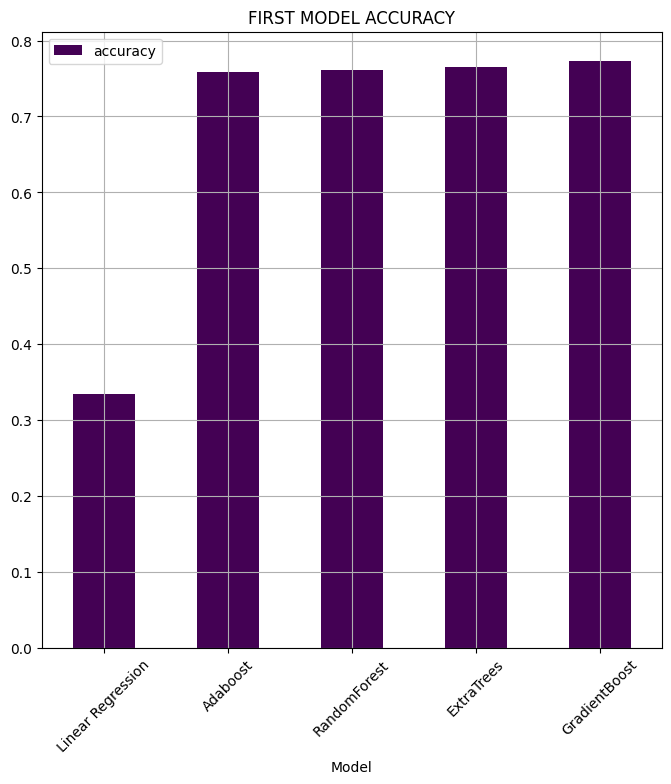

In [ ]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

In [ ]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7357
1,RandomForest,0.7516
2,ExtraTrees,0.7589
3,GradientBoost,0.7507


[Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost')]

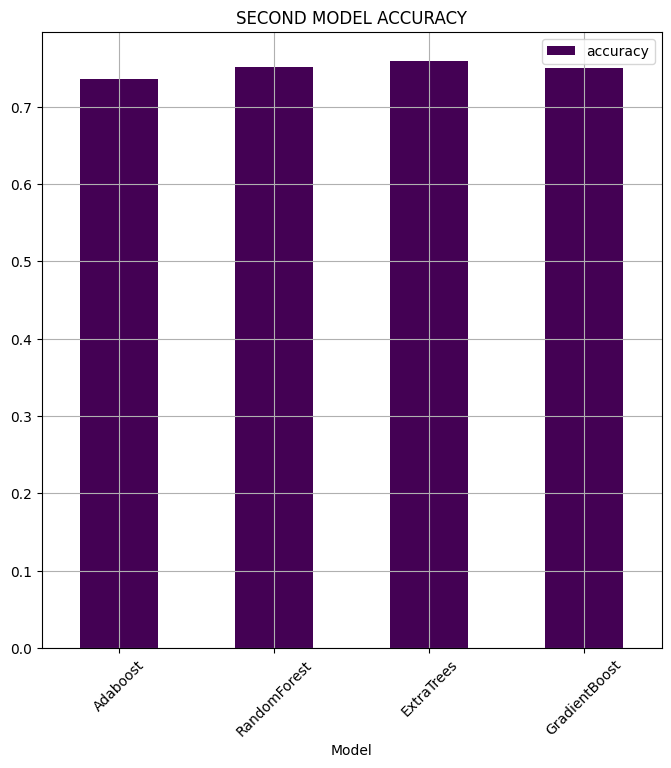

In [ ]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)
[Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost')]

In [ ]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.294314
1,Adaboost,0.755900
2,RandomForest,0.763600
3,ExtraTrees,0.758500
4,GradientBoost,0.769200
5,MLP,0.735300


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost'),
 Text(0, 0, 'MLP')]

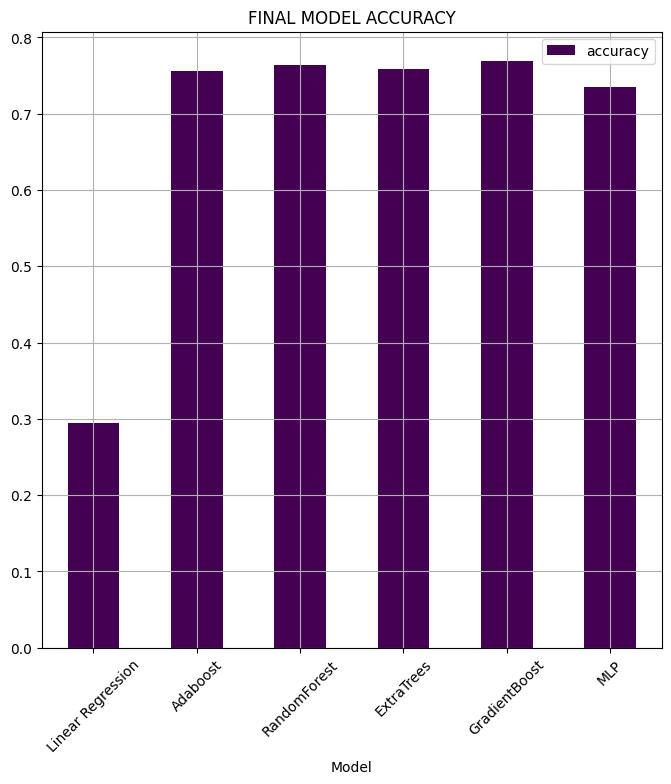

In [ ]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)
[Text(0,0,'Linear Regression'),
 Text(0,0,'Adaboost'),
 Text(0,0,'RandomForest'),
 Text(0,0,'ExtraTrees'),
 Text(0,0,'GradientBoost'),
 Text(0,0,'MLP')]